In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [22]:
import os
dir_list = os.listdir('../assets/classification')
dir_list

['Data USA - Map of Median Property Value by County.csv',
 'Data USA - Map of High School Graduation by County.csv',
 'Data USA - Map of Teen Births (Age 15-19) per 1,000 People by County.csv',
 'Data USA - Map of Percent Uninsured (Adults) by County.csv',
 'Data USA - Map of Unemployment by County.csv',
 'Data USA - Map of Median Household Income by County.csv',
 'Data USA - Map of Average Travel Time by County.csv',
 'Data USA - Map of Child Mortality per 100,000 People by County.csv',
 'Data USA - Map of Rural Population by County.csv',
 'Data USA - Map of HIV Diagnoses per 100,000 People by County.csv']

Let's just take a look so we can get an idea of what we're dealing with.
Choosing 2 at random.

In [4]:
df1 = pd.read_csv('../assets/classification/Data USA - Map of Average Travel Time by County.csv')
df1.head()

,year,geo_name,geo,mean_commute_minutes
0,2015,Pike County,05000US42103,42.1331
1,2015,"Bronx County, NY",05000US36005,41.6023
2,2015,"Richmond County, NY",05000US36085,41.5824
3,2013,"Charles County, MD",05000US24017,41.5622
4,2015,"Queens County, NY",05000US36081,41.5550


In [5]:
df2 = pd.read_csv('../assets/classification/Data USA - Map of Rural Population by County.csv')
df2.head()

,year,geo_name,geo,population_living_in_a_rural_area
0,2016,Kemper County,05000US28069,1.0
1,2015,Kemper County,05000US28069,1.0
2,2017,Kemper County,05000US28069,1.0
3,2017,Walthall County,05000US28147,1.0
4,2016,Walthall County,05000US28147,1.0


In [6]:
df2.loc[np.where(df2.geo_name == 'Pike County')]

,year,geo_name,geo,population_living_in_a_rural_area
175,2017,Pike County,05000US18125,1.000
176,2016,Pike County,05000US18125,1.000
177,2015,Pike County,05000US18125,1.000
640,2017,Pike County,05000US05109,1.000
641,2016,Pike County,05000US05109,1.000
642,2015,Pike County,05000US05109,1.000
2138,2016,Pike County,05000US13231,0.990
2139,2017,Pike County,05000US13231,0.990
2140,2015,Pike County,05000US13231,0.990
2358,2016,Pike County,05000US21195,0.878


In [7]:
def make_fips_cols(df,g='geo'):
    # 05000US prefix is 7 characters long, so we can neatly cut out 
    # the 2 character state and 3 character county codes. 
    try:
        df['STATEFP'] = [i[7:9] for i in df[g]]
        df['COUNTYFP'] = [i[9:13] for i in df[g]]
        return df
    except IndexError:
        print('This file has an incorrect format')
df2 = make_fips_cols(df2)
df2.head()

,year,geo_name,geo,population_living_in_a_rural_area,STATEFP,COUNTYFP
0,2016,Kemper County,05000US28069,1.0,28,069
1,2015,Kemper County,05000US28069,1.0,28,069
2,2017,Kemper County,05000US28069,1.0,28,069
3,2017,Walthall County,05000US28147,1.0,28,147
4,2016,Walthall County,05000US28147,1.0,28,147


In [8]:
import geopandas as gpd
fp = '../assets/us_5m/cb_2016_us_county_5m.shp'
gdf = gpd.read_file(fp)

In [9]:
gdf.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,04,015,00025445,0500000US04015,04015,Mohave,06,34475567011,387344307,"POLYGON ((-114.755618 36.087166, -114.753638 3..."
1,12,035,00308547,0500000US12035,12035,Flagler,06,1257365642,221047161,"POLYGON ((-81.52365999999999 29.622432, -81.32..."
2,20,129,00485135,0500000US20129,20129,Morton,06,1889993251,507796,"POLYGON ((-102.041952 37.024742, -102.04195 37..."
3,28,093,00695770,0500000US28093,28093,Marshall,06,1828989833,9195190,"POLYGON ((-89.7243244282036 34.9952117286505, ..."
4,29,510,00767557,0500000US29510,29510,St. Louis,25,160458044,10670040,"POLYGON ((-90.318212 38.600017, -90.301828 38...."


This isn't really necessary, I could build a classification model without digging into the guts of this, but I'd like to be able to visualize what's going on.

Plus, it's a chance for me to show off my GIS background

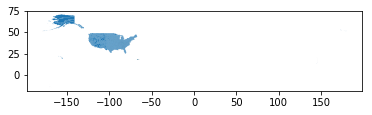

In [10]:
gdf.plot()

In [11]:
# could have made a 'GEOID' column by crunching the two columns together
gdf = gdf.merge(df2, on=['STATEFP','COUNTYFP'])
gdf.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,year,geo_name,geo,population_living_in_a_rural_area
0,04,015,00025445,0500000US04015,04015,Mohave,06,34475567011,387344307,"POLYGON ((-114.755618 36.087166, -114.753638 3...",2016,"Mohave County, AZ",05000US04015,0.230
1,04,015,00025445,0500000US04015,04015,Mohave,06,34475567011,387344307,"POLYGON ((-114.755618 36.087166, -114.753638 3...",2017,"Mohave County, AZ",05000US04015,0.230
2,04,015,00025445,0500000US04015,04015,Mohave,06,34475567011,387344307,"POLYGON ((-114.755618 36.087166, -114.753638 3...",2015,"Mohave County, AZ",05000US04015,0.230
3,12,035,00308547,0500000US12035,12035,Flagler,06,1257365642,221047161,"POLYGON ((-81.52365999999999 29.622432, -81.32...",2017,Flagler County,05000US12035,0.103
4,12,035,00308547,0500000US12035,12035,Flagler,06,1257365642,221047161,"POLYGON ((-81.52365999999999 29.622432, -81.32...",2016,Flagler County,05000US12035,0.103


OK - everything went well, let's bring in the other dataframes

We have 10 tables, each with about 10,000 entries each. This might be a good place to use Spark.

In [12]:
import pyspark as ps

spark = ps.sql.SparkSession.builder \
            .master("local[4]") \
            .appName("df challenge") \
            .getOrCreate()

In [13]:
sc = spark.sparkContext 
print("spark context loaded successfully")

spark context loaded successfully


In [14]:
spark

In [15]:
df_spark = sc.parallelize(df2)
df_spark.count()

6

In [16]:
type(df_spark)

pyspark.rdd.RDD

In [17]:
from pyspark.sql import SQLContext
sql_ctx = SQLContext(sc)
sql_ctx.createDataFrame(df2).show()

+----+---------------+------------+---------------------------------+-------+--------+
|year|       geo_name|         geo|population_living_in_a_rural_area|STATEFP|COUNTYFP|
+----+---------------+------------+---------------------------------+-------+--------+
|2016|  Kemper County|05000US28069|                              1.0|     28|     069|
|2015|  Kemper County|05000US28069|                              1.0|     28|     069|
|2017|  Kemper County|05000US28069|                              1.0|     28|     069|
|2017|Walthall County|05000US28147|                              1.0|     28|     147|
|2016|Walthall County|05000US28147|                              1.0|     28|     147|
|2015| Carroll County|05000US28015|                              1.0|     28|     015|
|2015|    Polk County|05000US47139|                              1.0|     47|     139|
|2016| Pickett County|05000US47137|                              1.0|     47|     137|
|2015| Pickett County|05000US47137|        

Awesome - now let's see if we can use this to handle the 10 datasets

Let's make a list of the columns we care aboue:

In [23]:
col_list = []
for i in dir_list:
    fp = '../assets/classification/'+i
    temp = pd.read_csv(fp)
    print(temp.sample(5))
    [col_list.append(i) for i in temp.columns.values[3:]]
col_list

      year            geo_name           geo median_property_value  \
6452  2014      Houston County  05000US47083               92000.0   
4183  2015  Switzerland County  05000US18155              119100.0   
6046  2014       Taylor County  05000US21217               96300.0   
7135  2015         Holt County  05000US29087               86200.0   
2685  2013       Oconto County  05000US55083              147700.0   

     median_property_value_moe  
6452                    5867.0  
4183                    9963.0  
6046                    5166.0  
7135                    4185.0  
2685                    3518.0  
      year           geo_name           geo high_school_graduation
2016  2016  Shenandoah County  05000US51171                   0.91
7844  2015     Coahoma County  05000US28027                  0.608
1522  2016    Campbell County  05000US21037                  0.924
8156  2017      Arthur County  05000US31005                   None
2528  2016   Limestone County  05000US01083   

['median_property_value',
 'median_property_value_moe',
 'high_school_graduation',
 'teen_births',
 'uninsured_adults',
 'unemployment',
 'income',
 'income_moe',
 'income_rank',
 'mean_commute_minutes',
 'child_mortality',
 'population_living_in_a_rural_area',
 'hiv_prevalence_rate']

In [24]:
year_list = []
for i in dir_list:
    fp = '../assets/classification/'+i
    temp = pd.read_csv(fp)
    print('---------------------')
    print(temp.info())

---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9661 entries, 0 to 9660
Data columns (total 5 columns):
year                         9661 non-null int64
geo_name                     9661 non-null object
geo                          9661 non-null object
median_property_value        9661 non-null object
median_property_value_moe    9661 non-null object
dtypes: int64(1), object(4)
memory usage: 377.5+ KB
None
---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9418 entries, 0 to 9417
Data columns (total 4 columns):
year                      9418 non-null int64
geo_name                  9418 non-null object
geo                       9418 non-null object
high_school_graduation    9418 non-null object
dtypes: int64(1), object(3)
memory usage: 294.4+ KB
None
---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9418 entries, 0 to 9417
Data columns (total 4 columns):
year           9418 non-null int64
geo_name       9418 non-null ob

In [26]:
import psycopg2
conn = psycopg2.connect(dbname='geodata', user='postgres', host='/tmp')
c = conn.cursor()

In [27]:
# Before I do this, let's just double check the number of years
years = set()
for i in dir_list:
    fp = '../assets/classification/'+i
    temp = pd.read_csv(fp)
    [years.add(str(i)) for i in temp.year.values]
years

{'2013', '2014', '2015', '2016', '2017'}

In [34]:
table_names

NameError: name 'table_names' is not defined

In [69]:
for i in years:
    SQL = '''CREATE TABLE if NOT EXISTS map_data_{} (
    geoid INT PRIMARY KEY, geo_name TEXT, year TEXT, median_property_value INT,
    median_property_value_moe INT, high_school_graduation REAL, teen_births REAL,
    uninsured_adults REAL, unemployment REAL, income INT,
    income_moe INT, income_rank INT, mean_commute_minutes REAL,
    child_mortality REAL, population_living_in_a_rural_area REAL, hiv_prevalence_rate REAL
    )'''.format(i)
    c.execute(SQL)
conn.commit()

I really wanted to do something clever with a for loop, to make the SQL tables/columns automatically, but I had trouble getting the 'execute()' method to handle the query parameters properly.

Normally I would never use string formatting to built an SQL query, but this is a toy example that won't ever interact with the public, and time is an issue.

In [28]:
schema_list = [['median_property_value REAL, median_property_value_moe REAL'],
               ['high_school_graduation REAL'],['teen_births REAL'],['uninsured_adults REAL'],
               ['unemployment REAL'],['income REAL, income_moe REAL, income_rank REAL'],
               ['mean_commute_minutes REAL'],['child_mortality REAL'],
               ['population_living_in_a_rural_area REAL'],['hiv_prevalence_rate REAL']]

In [33]:
for i,j in zip(schema_list, dir_list):
    print(j)
    print('\ti)
    print('---------------')

Data USA - Map of Median Property Value by County.csv
	 ['median_property_value REAL, median_property_value_moe REAL']
---------------
Data USA - Map of High School Graduation by County.csv
	 ['high_school_graduation REAL']
---------------
Data USA - Map of Teen Births (Age 15-19) per 1,000 People by County.csv
	 ['teen_births REAL']
---------------
Data USA - Map of Percent Uninsured (Adults) by County.csv
	 ['uninsured_adults REAL']
---------------
Data USA - Map of Unemployment by County.csv
	 ['unemployment REAL']
---------------
Data USA - Map of Median Household Income by County.csv
	 ['income REAL, income_moe REAL, income_rank REAL']
---------------
Data USA - Map of Average Travel Time by County.csv
	 ['mean_commute_minutes REAL']
---------------
Data USA - Map of Child Mortality per 100,000 People by County.csv
	 ['child_mortality REAL']
---------------
Data USA - Map of Rural Population by County.csv
	 ['population_living_in_a_rural_area REAL']
---------------
Data USA - Map 

In [307]:
conn.rollback()

In [313]:
for d,t,sch in zip(dir_list,table_names,schema_list):
    fp = '../assets/classification/'+d
    df = pd.read_csv(fp)
    df = make_geoid(df)
    for y in years:
        table_name = t+y
        df_cols = df.columns.values[3:]
        df_cols = np.concatenate((['geo','geo_name'], df_cols), axis=0)
        SQL = '''CREATE TABLE if NOT EXISTS {} (
        geoid INT, geo_name TEXT, {});'''.format(table_name, sch[0])
        c.execute(SQL)
        conn.commit()
        if len(sch[0].split(','))==1: 
            SQL = "INSERT INTO {0} VALUES (%s, %s, %s)".format(table_name)
        elif len(sch[0].split(','))==2:
            SQL = "INSERT INTO {0} VALUES (%s, %s, %s, %s)".format(table_name)
        else:
            SQL = "INSERT INTO {0} VALUES (%s, %s, %s, %s, %s)".format(table_name)
        for i in np.where(df.year==int(y))[0]:
            c.execute(SQL,tuple([i if i != 'None' else None for i in df[df_cols].loc[i]]))
            # The list comp in the c.execute() call is to handle 'None' in string format. 
            # psycopg2 isn't able to figure out that it's a missing value otherwise, and it
            # assumes I'm trying to put text into a numeric field.

In [ ]:
for i in years:
    SQL = '''CREATE TABLE if NOT EXISTS map_data_{} (
    geoid INT PRIMARY KEY, geo_name TEXT, year TEXT, median_property_value INT,
    median_property_value_moe INT, high_school_graduation REAL, teen_births REAL,
    uninsured_adults REAL, unemployment REAL, income INT,
    income_moe INT, income_rank INT, mean_commute_minutes REAL,
    child_mortality REAL, population_living_in_a_rural_area REAL, hiv_prevalence_rate REAL
    )'''.format(i)
    c.execute(SQL)
    
conn.commit()

In [ ]:
SQL = 

So now we have a nice, clean PostgreSQL database - as per the ReadMe for this challenge. 